In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

In [3]:
X_scaled = StandardScaler().fit_transform(X)

In [4]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

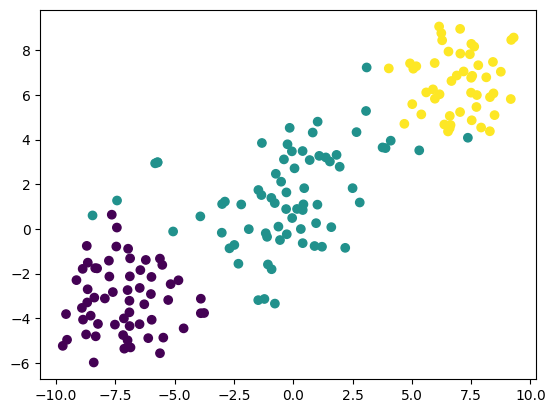

In [5]:
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

## perplexity

the number of effective nearest neighbors.
Low perplexity → focus more on local structure (small neighborhoods)

High perplexity → considers larger neighborhoods, smoother clusters

#### learning_rate

Step size for optimization.

Effect:

Too low → points collapse, very tight clusters

Too high → points spread too much or scatter

### n_iter

Number of iterations for gradient descent optimization.

Default = 1000, but sometimes 2500–5000 improves stability.

## Tuning

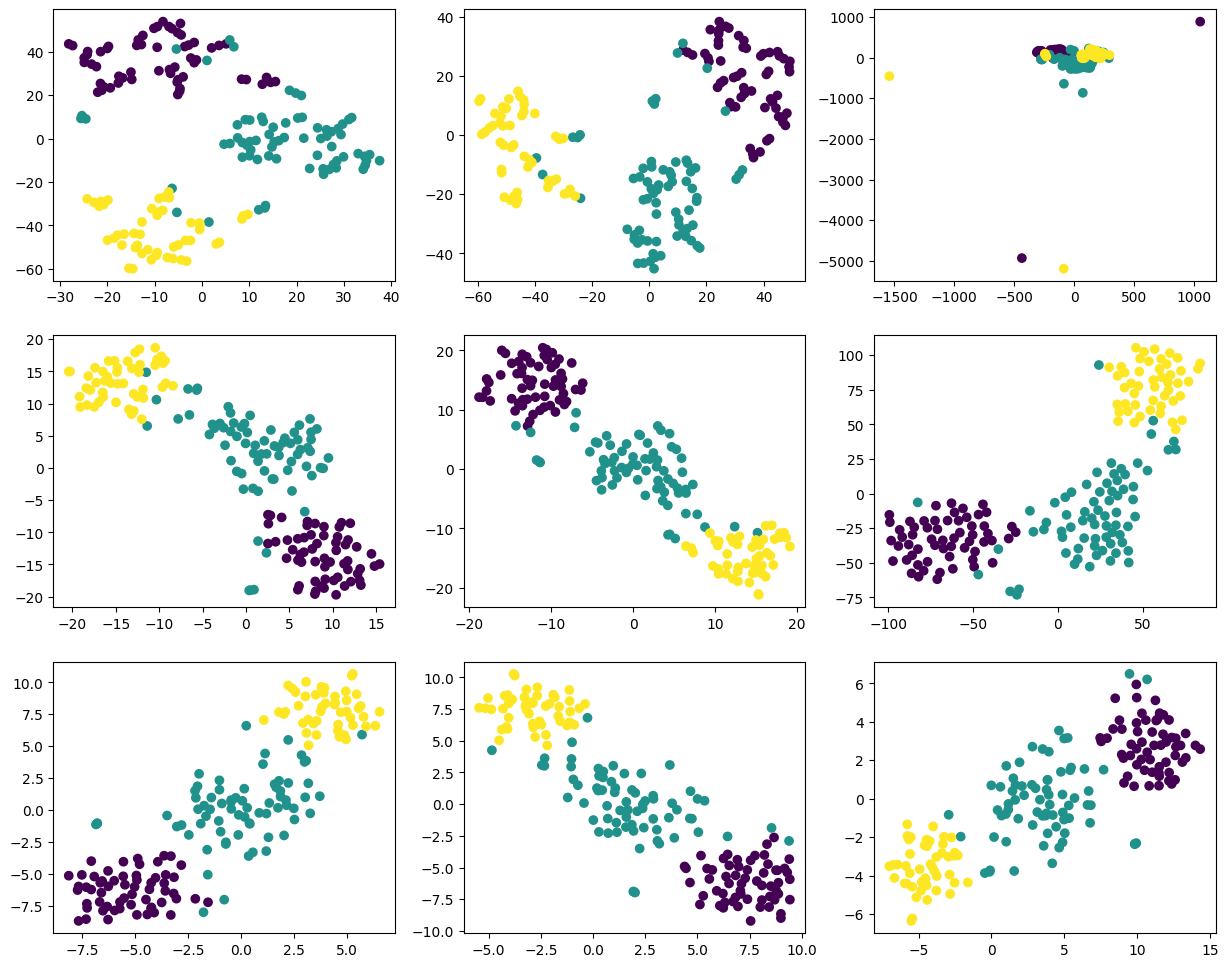

In [9]:
perplexities = [5, 20, 40]
learning_rates = [50, 200, 500]

fig, axes = plt.subplots(len(perplexities), len(learning_rates), figsize=(15,12))

for i, perp in enumerate(perplexities):
    for j, lr in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        
        ax = axes[i, j]
        scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y)